## UNIVERSIDAD AUTONOMA DE AGUASCALIENTES
### Departamento: Centro de Ciencias Básicas 
### Jose Luis Sandoval Perez
### Curso: Metaheurística I
### Maestro: Francisco Javier Luna Rosas
### 7mo Semestre

# PRACTICA No 5: PSO
### La optimización por enjambre de partícula (PSO) es un algoritmo de optimización basado a simulación de la conducta social de organismo, como badadas de aves o bancos de peces

### En esta práctica implementamos PSO para buscar el óptimo global de una función en 2D (f(x) = - [1-(11/2 x - 7/2)^2] [cos(11/2 x - 7/2) +1] +2).

## Paso 1: Importar las librerías necesarias

In [1]:
# Librerias
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## Paso 2: Definir la función objetivo

In [2]:
# Funcion objetivo
def objetive_f(x):
    return (1-((11/2 * x) - 7/2)**2) * (np.cos((11/2 * x) - 7/2)+1)+2

## Paso 3: Inicializar los parametros del PSO

In [3]:
# Parametros del PSo
num_particles = 30
num_dimensions = 1
num_iteraciones = 100
w = 0.5 # Factor de inercia que controla la velocidad
c1 = 1.5 # Constante cognitivia
c2 = 2.0 # Constante social

# Limites de la busqueda
bounds = (-10,10)

history_position = []

## Paso 4: Inicializamos las particulas y velocidades

In [4]:
# Inicializar las particulas
particles = np.random.uniform(bounds[0], bounds[1], (num_particles, num_dimensions))
velocities = np.random.uniform(-1, 1, (num_particles, num_dimensions)) # Valor aleatorio entre -1 y 1

# Inicializar las mejores posiciones individuales y globales
pbest_position = particles.copy()
pbest_value = np.array([objetive_f(x) for x in particles])
gbest_position = pbest_position[np.argmin(pbest_value)] # Minimo valor de x
gbest_value = np.min(pbest_value) # Valor de la funcion par la funcion xi

# Una particula (pbest) representa x, pero x no es la solucion
# La solucion se obtiene a partir del calculo de las x

#particles

## Paso 5: Implementar el ciclo principal del PSO

In [5]:
for t in range (num_iteraciones):
    for i in range (num_particles):
        # Evaluar la funcion objetivo
        fitness = objetive_f(particles[i])

        # Actualizar la mejor posicion individual
        if fitness < pbest_value[1]:
            pbest_value[1] = fitness
            pbest_position[i] = particles[i].copy()

        # Actualizar la mejor posicion global
        if fitness < gbest_value:
            gbest_value = fitness
            gbest_position = particles[i].copy()

    # Actualizar velocidades y posiciones
    for i in range (num_particles):
        r1 = random.random()
        r2 = random.random()

        velocities[i] = (w * velocities [i]
                         + c1 * r1 * (pbest_position[i] - particles[i])
                         + c2 * r2 * (gbest_position - particles[i]))
        
        particles[i] = particles[i] + velocities[i]

        # Respteatar los limites de la busqueda
        particles[i] = np.clip(particles[i], bounds[0], bounds[1])

    history_position.append(particles.copy()) # Para graficar
    print(f"Iteracion {t+1} / {num_iteraciones}, Mejor valor global: {gbest_value}")

print(f"Mejor posicion encontrada: {gbest_position}, con valor: {gbest_value} ")

Iteracion 1 / 100, Mejor valor global: -3612.3319035045356
Iteracion 2 / 100, Mejor valor global: [-5047.89428371]
Iteracion 3 / 100, Mejor valor global: [-5047.89428371]
Iteracion 4 / 100, Mejor valor global: [-5047.89428371]
Iteracion 5 / 100, Mejor valor global: [-5047.89428371]
Iteracion 6 / 100, Mejor valor global: [-5047.89428371]
Iteracion 7 / 100, Mejor valor global: [-5047.89428371]
Iteracion 8 / 100, Mejor valor global: [-5056.71434975]
Iteracion 9 / 100, Mejor valor global: [-5056.71434975]
Iteracion 10 / 100, Mejor valor global: [-5056.71434975]
Iteracion 11 / 100, Mejor valor global: [-5056.71434975]
Iteracion 12 / 100, Mejor valor global: [-5056.71434975]
Iteracion 13 / 100, Mejor valor global: [-5056.71434975]
Iteracion 14 / 100, Mejor valor global: [-5056.71434975]
Iteracion 15 / 100, Mejor valor global: [-5056.71434975]
Iteracion 16 / 100, Mejor valor global: [-5056.71434975]
Iteracion 17 / 100, Mejor valor global: [-5056.71434975]
Iteracion 18 / 100, Mejor valor globa

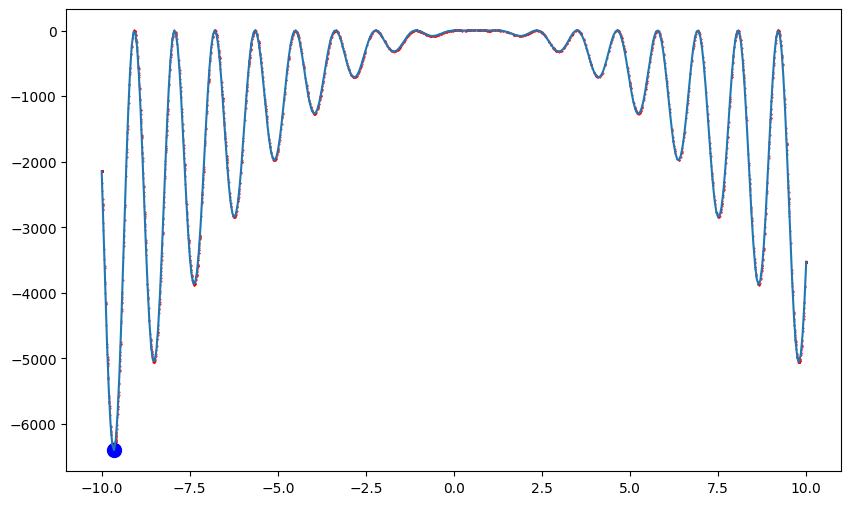

In [6]:
x_values=np.linspace(-10,10,400)
y_values=objetive_f(x_values)

plt.figure(figsize=(10,6))
plt.plot(x_values,y_values, label="Funcion objetivo")

for positions in history_position:
    plt.scatter(positions, objetive_f(positions), color="red", s=0.2)

plt.scatter([gbest_position],[objetive_f(gbest_position)], color="blue", s=100, label="Mejor solucion")